In [1]:
import csv
import cv2
import numpy as np
from random import shuffle

def readData(filepath):
    csvFile=open(filepath+"/driving_log.csv")
    images=[]
    angles=[]
    reader=csv.reader(csvFile)
    
    lines=[]
    for line in reader:
        lines.append(line)
    
    # shuffle
    shuffle(lines)
    
    for line in lines:
        # center 0,3
        imageName=line[0].split("/")[-1]
        angle=float(line[3])
        images.append(filepath+"/IMG/"+imageName)
        angles.append(angle)
        
        #left 1,3
        imageName=line[1].split("/")[-1]
        angle=float(line[3])
        images.append(filepath+"/IMG/"+imageName)
        angles.append(angle+0.2)
        
        #right 2,3
        imageName=line[2].split("/")[-1]
        angle=float(line[3])
        images.append(filepath+"/IMG/"+imageName)
        angles.append(angle-0.2)
        
        #image=cv2.imread(filepath+"/IMG/"+imageName)
        #image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        
    return np.array(images),np.array(angles)

x,y=readData("data")
# Taking copy
X_train=x
Y_train=y
print("Total Data available: ",len(X_train))

Total Data available:  24108


(array([  2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   8.00000000e+00,
          6.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.70000000e+01,
          1.20000000e+01,   1.00000000e+00,   2.00000000e+00,
          4.00000000e+00,   1.50000000e+01,   1.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   1.00000000e+01,
          8.00000000e+00,   1.00000000e+01,   1.00000000e+00,
          9.00000000e+00,   4.00000000e+00,   5.00000000e+00,
          1.00000000e+00,   9.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.40000000e+01,   9.00000000e+00,
        

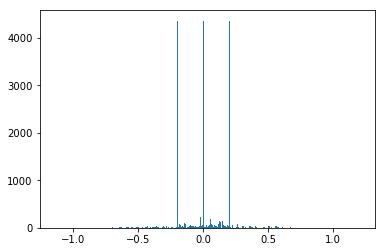

In [2]:
#Input data distribution
import matplotlib.pyplot as plt
%matplotlib inline
op_class=np.unique(Y_train)
plt.hist(Y_train,op_class)

In [3]:
from collections import Counter
Output_Dense=Counter(Y_train)
print(Output_Dense)

Counter({0.0: 4361, -0.20000000000000001: 4361, 0.20000000000000001: 4361, 0.1765823: 237, -0.023417700000000014: 237, 0.37658230000000004: 237, 0.054793599999999998: 179, -0.34520640000000002: 179, -0.14520640000000001: 179, -0.10953450000000001: 165, 0.090465500000000004: 165, 0.29046550000000004: 165, -0.059757190000000002: 152, -0.25975719000000003: 152, 0.14024281: 152, -0.078745899999999994: 150, -0.27874589999999999: 150, 0.12125410000000002: 150, 0.16701379999999999: 136, 0.3670138: 136, -0.032986200000000021: 136, 0.13074846000000001: 129, -0.26925154000000001: 129, -0.06925154: 129, 0.042622840000000002: 106, 0.24262284000000001: 106, -0.15737716000000002: 106, -0.071260400000000002: 98, 0.32873960000000002: 98, 0.12873960000000001: 98, 0.071328440000000007: 92, -0.14780863: 92, -0.12867156000000002: 92, 0.25219137000000003: 92, 0.052191370000000001: 92, 0.27132844: 92, -0.088240260000000001: 80, 0.11175974000000001: 80, -0.28824026000000003: 80, -0.002791043: 79, -0.20279104

In [4]:
# Setting boundary for data 
def Skipper(x,y,maximum,minimum):
    X_augument=[]
    Y_augument=[]
    for ind in range(len(Y_train)):
        if (Output_Dense[Y_train[ind]]>minimum):
            if class_size[Y_train[ind]]<maximum:
                class_size[Y_train[ind]]=class_size[Y_train[ind]]+1
                X_augument.append(X_train[ind])
                Y_augument.append(Y_train[ind])
    return np.array(X_augument),np.array(Y_augument)

class_size=dict(Output_Dense).fromkeys(Output_Dense,0)
X_augument,Y_augument=Skipper(X_train,Y_train,1000,10)
print("X_Augumented Size",len(X_augument))
print("Y_Augumented Size",len(Y_augument))

X_Augumented Size 13329
Y_Augumented Size 13329


(array([   17.,    12.,    15.,    14.,    43.,    38.,    31.,    18.,
           11.,    17.,    12.,    36.,    41.,    56.,    15.,    16.,
           20.,    36.,    49.,   179.,    51.,    26.,    55.,    14.,
           33.,    23.,    43.,    80.,    38.,   150.,    31.,   129.,
           18.,   152.,    61.,    11.,    17.,    46.,    12.,    38.,
           36.,    49.,    41.,    31.,    56.,    15.,    79.,  1000.,
           12.,    74.,    16.,    53.,    20.,    32.,    36.,   106.,
           49.,    92.,   179.,    71.,    51.,    92.,    26.,    27.,
           55.,    14.,   165.,    33.,    66.,    23.,    43.,    19.,
           80.,    38.,    23.,   150.,    31.,    98.,   129.,    18.,
           37.,   152.,    31.,    61.,    11.,    69.,    46.,   136.,
           38.,    36.,   237.,    49.,    41.,    37.,    31.,    56.,
           28.,    79.,  1000.,    12.,    14.,    74.,    25.,    16.,
           53.,    20.,    32.,    11.,    36.,   106.,    49., 

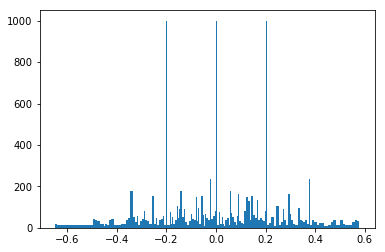

In [5]:
# Data Distrobution after fixing boundary
op_class=np.unique(Y_augument)
plt.hist(Y_augument,op_class)

X_Augumented Size 10818
Y_Augumented Size 10818


(array([  17.,   12.,   15.,   14.,   43.,   38.,   31.,   18.,   11.,
          17.,   12.,   36.,   41.,   56.,   15.,   16.,   20.,   36.,
          49.,  179.,   51.,   26.,   55.,   14.,   33.,   23.,   43.,
          80.,   38.,  150.,   31.,  129.,   18.,  152.,   61.,   11.,
          17.,   46.,   12.,   38.,   36.,   49.,   41.,   31.,   56.,
          15.,   79.,  200.,   12.,   74.,   16.,   53.,   20.,   32.,
          36.,  106.,   49.,   92.,  179.,   71.,   51.,   92.,   26.,
          27.,   55.,   14.,  165.,   33.,   66.,   23.,   43.,   19.,
          80.,   38.,   23.,  150.,   31.,   98.,  129.,   18.,   37.,
         152.,   31.,   61.,   11.,   69.,   46.,  136.,   38.,   36.,
         200.,   49.,   41.,   37.,   31.,   56.,   28.,   79.,  200.,
          12.,   14.,   74.,   25.,   16.,   53.,   20.,   32.,   11.,
          36.,  106.,   49.,   92.,   14.,  179.,   71.,   26.,   51.,
          92.,   36.,   26.,   27.,   12.,   55.,  165.,   33.,   66.,
      

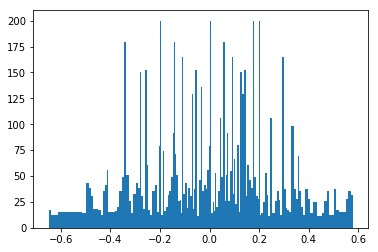

In [6]:
# Redefining boundary lines
class_size=dict(Output_Dense).fromkeys(Output_Dense,0)
X_augument,Y_augument=Skipper(X_augument,Y_augument,200,10)
print("X_Augumented Size",len(X_augument))
print("Y_Augumented Size",len(Y_augument))
# Data Distrobution after fixing boundary
op_class=np.unique(Y_augument)
plt.hist(Y_augument,op_class)

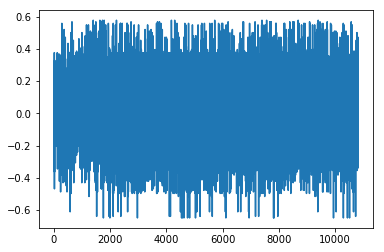

In [7]:
plt.plot(range(len(Y_augument)),Y_augument)

In [8]:
# Load images into the memory
def load_images(X_data):
    images=[]
    for imagepath in X_data:
        image=cv2.imread(imagepath)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images.append(image)
    return np.array(images)
X_augument=load_images(X_augument)

(160, 320, 3)


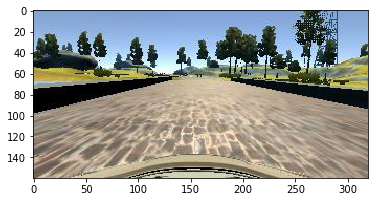

In [9]:
# Cropping images
img=plt.imread("data/IMG/center_2016_12_01_13_30_48_287.jpg")
plt.imshow(img)
print(img.shape)

(85, 320, 3)
Selected Upper limit : 55
Selected Lower limit : 20


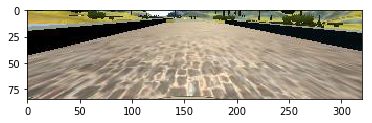

In [10]:
crop_img=img[55:140][:][:]
plt.imshow(crop_img)
print(crop_img.shape)
print("Selected Upper limit :",55)
print("Selected Lower limit :",20)

In [11]:
print("Input Shape : ",X_augument.shape)
print("Output Shape : ",Y_augument.shape)

Input Shape :  (10818, 160, 320, 3)
Output Shape :  (10818,)


In [12]:
#Model 1
# Selected Model from second set
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Convolution2D,Lambda,Cropping2D,MaxPooling2D

Model_1 = Sequential()

# Image Augumentation
# 1. Cropping image
Model_1.add(Cropping2D(cropping=((55,20),(0,0)),input_shape=(160,320,3)))
# 2. Normalization of image
Model_1.add(Lambda(lambda x:(x/255.0)-0.5))

# Neural Networks
# Layer 1
Model_1.add(Convolution2D(6,3,3))
Model_1.add(MaxPooling2D(pool_size=(2,2)))
Model_1.add(Activation("elu"))
# Layer 2
Model_1.add(Convolution2D(36,5,5))
Model_1.add(MaxPooling2D(pool_size=(2,2)))
Model_1.add(Activation("elu"))
# Layer 3
Model_1.add(Flatten())
Model_1.add(Dense(120))
Model_1.add(Activation("elu"))
# Layer 4
Model_1.add(Dense(1))

Model_1.compile(loss='mse',optimizer='Adam')

Using TensorFlow backend.


In [13]:
history=Model_1.fit(X_augument,Y_augument,validation_split=0.2,shuffle=True,nb_epoch=10)
Model_1.save("3_Model_1.h5")

Train on 8654 samples, validate on 2164 samples
Epoch 1/10
8654/8654 [==============================] - 30s - loss: 0.7411 - val_loss: 0.0252
Epoch 2/10
8654/8654 [==============================] - 26s - loss: 0.0187 - val_loss: 0.0172
Epoch 3/10
8654/8654 [==============================] - 26s - loss: 0.0146 - val_loss: 0.0161
Epoch 4/10
8654/8654 [==============================] - 26s - loss: 0.0122 - val_loss: 0.0142
Epoch 5/10
8654/8654 [==============================] - 26s - loss: 0.0106 - val_loss: 0.0138
Epoch 6/10
8654/8654 [==============================] - 26s - loss: 0.0090 - val_loss: 0.0138
Epoch 7/10
8654/8654 [==============================] - 26s - loss: 0.0074 - val_loss: 0.0146
Epoch 8/10
8654/8654 [==============================] - 26s - loss: 0.0067 - val_loss: 0.0173
Epoch 9/10
8654/8654 [==============================] - 26s - loss: 0.0053 - val_loss: 0.0140
Epoch 10/10
8654/8654 [==============================] - 26s - loss: 0.0046 - val_loss: 0.0132


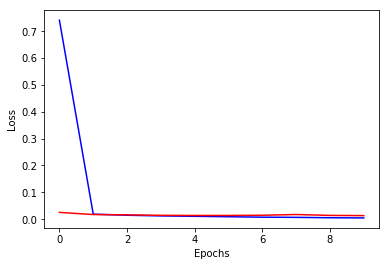

In [14]:
# Plotting the data
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Graphs/3_Model_1.png")

In [15]:
Model_1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_1 (Cropping2D)        (None, 85, 320, 3)    0           cropping2d_input_1[0][0]         
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 85, 320, 3)    0           cropping2d_1[0][0]               
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 83, 318, 6)    168         lambda_1[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 41, 159, 6)    0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [16]:
# Model 2
# adding drop out
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Convolution2D,Lambda,Cropping2D,MaxPooling2D,Dropout

Model_2 = Sequential()

# Image Augumentation
# 1. Cropping image
Model_2.add(Cropping2D(cropping=((55,20),(0,0)),input_shape=(160,320,3)))
# 2. Normalization of image
Model_2.add(Lambda(lambda x:(x/255.0)-0.5))

# Neural Networks
# Layer 1
Model_2.add(Convolution2D(6,3,3))
Model_2.add(MaxPooling2D(pool_size=(2,2)))
Model_2.add(Activation("elu"))
# Layer 2
Model_2.add(Convolution2D(36,5,5))
Model_2.add(MaxPooling2D(pool_size=(2,2)))
Model_2.add(Activation("elu"))
# Layer 3
Model_2.add(Flatten())
Model_2.add(Dense(120))
Model_2.add(Dropout(0.50))
Model_2.add(Activation("elu"))
# Layer 4
Model_2.add(Dense(1))

Model_2.compile(loss='mse',optimizer='Adam')

In [17]:
history=Model_2.fit(X_augument,Y_augument,validation_split=0.2,shuffle=True,nb_epoch=10)
Model_2.save("3_Model_2.h5")

Train on 8654 samples, validate on 2164 samples
Epoch 1/10
8654/8654 [==============================] - 26s - loss: 0.6414 - val_loss: 0.0617
Epoch 2/10
8654/8654 [==============================] - 26s - loss: 0.0633 - val_loss: 0.0373
Epoch 3/10
8654/8654 [==============================] - 26s - loss: 0.0310 - val_loss: 0.0214
Epoch 4/10
8654/8654 [==============================] - 26s - loss: 0.0199 - val_loss: 0.0210
Epoch 5/10
8654/8654 [==============================] - 26s - loss: 0.0144 - val_loss: 0.0200
Epoch 6/10
8654/8654 [==============================] - 26s - loss: 0.0123 - val_loss: 0.0186
Epoch 7/10
8654/8654 [==============================] - 26s - loss: 0.0105 - val_loss: 0.0189
Epoch 8/10
8654/8654 [==============================] - 26s - loss: 0.0092 - val_loss: 0.0186
Epoch 9/10
8654/8654 [==============================] - 26s - loss: 0.0086 - val_loss: 0.0179
Epoch 10/10
8654/8654 [==============================] - 26s - loss: 0.0074 - val_loss: 0.0172


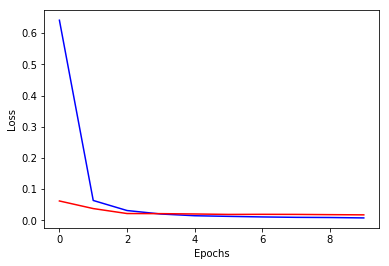

In [18]:
# Plotting the data
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Graphs/3_Model_2.png")

In [19]:
Model_2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_2 (Cropping2D)        (None, 85, 320, 3)    0           cropping2d_input_2[0][0]         
____________________________________________________________________________________________________
lambda_2 (Lambda)                (None, 85, 320, 3)    0           cropping2d_2[0][0]               
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 83, 318, 6)    168         lambda_2[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 41, 159, 6)    0           convolution2d_3[0][0]            
___________________________________________________________________________________________

In [20]:
# Model 3
# Adding leaky relu as activation
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Convolution2D,Lambda,Cropping2D,MaxPooling2D,Dropout
from keras.layers.advanced_activations import LeakyReLU


Model_3 = Sequential()

# Image Augumentation
# 1. Cropping image
Model_3.add(Cropping2D(cropping=((55,20),(0,0)),input_shape=(160,320,3)))
# 2. Normalization of image
Model_3.add(Lambda(lambda x:(x/255.0)-0.5))

# Neural Networks
# Layer 1
Model_3.add(Convolution2D(6,3,3))
Model_3.add(Activation("linear"))
Model_3.add(MaxPooling2D(pool_size=(2,2)))
Model_3.add(LeakyReLU(alpha=0.003))

# Layer 2
Model_3.add(Convolution2D(36,5,5))
Model_3.add(Activation("linear"))
Model_3.add(MaxPooling2D(pool_size=(2,2)))
Model_3.add(LeakyReLU(alpha=0.003))

# Layer 3
Model_3.add(Flatten())
Model_3.add(Dense(120))

# Layer 4
Model_3.add(Dense(1))

Model_3.compile(loss='mse',optimizer='Adam')

In [21]:
history=Model_3.fit(X_augument,Y_augument,validation_split=0.2,shuffle=True,nb_epoch=10)
Model_3.save("3_Model_3.h5")

Train on 8654 samples, validate on 2164 samples
Epoch 1/10
8654/8654 [==============================] - 27s - loss: 1.2895 - val_loss: 0.0217
Epoch 2/10
8654/8654 [==============================] - 27s - loss: 0.0197 - val_loss: 0.0223
Epoch 3/10
8654/8654 [==============================] - 27s - loss: 0.0172 - val_loss: 0.0198
Epoch 4/10
8654/8654 [==============================] - 27s - loss: 0.0155 - val_loss: 0.0182
Epoch 5/10
8654/8654 [==============================] - 27s - loss: 0.0148 - val_loss: 0.0172
Epoch 6/10
8654/8654 [==============================] - 27s - loss: 0.0137 - val_loss: 0.0168
Epoch 7/10
8654/8654 [==============================] - 27s - loss: 0.0134 - val_loss: 0.0185
Epoch 8/10
8654/8654 [==============================] - 27s - loss: 0.0124 - val_loss: 0.0170
Epoch 9/10
8654/8654 [==============================] - 27s - loss: 0.0116 - val_loss: 0.0154
Epoch 10/10
8654/8654 [==============================] - 27s - loss: 0.0109 - val_loss: 0.0153


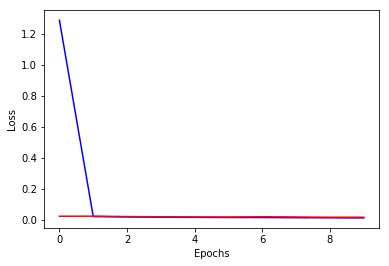

In [22]:
# Plotting the data
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Graphs/3_Model_3.png")

In [23]:
Model_3.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_3 (Cropping2D)        (None, 85, 320, 3)    0           cropping2d_input_3[0][0]         
____________________________________________________________________________________________________
lambda_3 (Lambda)                (None, 85, 320, 3)    0           cropping2d_3[0][0]               
____________________________________________________________________________________________________
convolution2d_5 (Convolution2D)  (None, 83, 318, 6)    168         lambda_3[0][0]                   
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 83, 318, 6)    0           convolution2d_5[0][0]            
___________________________________________________________________________________________

In [24]:
# Model 4
# Adding leaky relu as activation and reversing the kernal size
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Convolution2D,Lambda,Cropping2D,MaxPooling2D,Dropout
from keras.layers.advanced_activations import LeakyReLU

Model_4 = Sequential()

# Image Augumentation
# 1. Cropping image
Model_4.add(Cropping2D(cropping=((55,20),(0,0)),input_shape=(160,320,3)))
# 2. Normalization of image
Model_4.add(Lambda(lambda x:(x/255.0)-0.5))

# Neural Networks
# Layer 1
Model_4.add(Convolution2D(6,5,5))
Model_4.add(Activation("linear"))
Model_4.add(MaxPooling2D(pool_size=(2,2)))
Model_4.add(LeakyReLU(alpha=0.003))

# Layer 2
Model_4.add(Convolution2D(36,5,5))
Model_4.add(Activation("linear"))
Model_4.add(MaxPooling2D(pool_size=(2,2)))
Model_4.add(LeakyReLU(alpha=0.003))

# Layer 3
Model_4.add(Flatten())
Model_4.add(Dense(120))

# Layer 4
Model_4.add(Dense(1))

Model_4.compile(loss='mse',optimizer='Adam')

In [25]:
history=Model_4.fit(X_augument,Y_augument,validation_split=0.2,shuffle=True,nb_epoch=10)
Model_4.save("3_Model_4.h5")

Train on 8654 samples, validate on 2164 samples
Epoch 1/10
8654/8654 [==============================] - 30s - loss: 1.5353 - val_loss: 0.0497
Epoch 2/10
8654/8654 [==============================] - 30s - loss: 0.0391 - val_loss: 0.0309
Epoch 3/10
8654/8654 [==============================] - 30s - loss: 0.0277 - val_loss: 0.0270
Epoch 4/10
8654/8654 [==============================] - 30s - loss: 0.0241 - val_loss: 0.0238
Epoch 5/10
8654/8654 [==============================] - 30s - loss: 0.0215 - val_loss: 0.0214
Epoch 6/10
8654/8654 [==============================] - 30s - loss: 0.0193 - val_loss: 0.0191
Epoch 7/10
8654/8654 [==============================] - 30s - loss: 0.0169 - val_loss: 0.0168
Epoch 8/10
8654/8654 [==============================] - 30s - loss: 0.0147 - val_loss: 0.0158
Epoch 9/10
8654/8654 [==============================] - 30s - loss: 0.0134 - val_loss: 0.0146
Epoch 10/10
8654/8654 [==============================] - 30s - loss: 0.0122 - val_loss: 0.0141


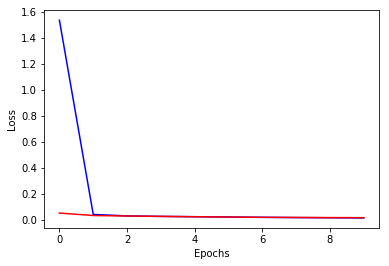

In [26]:
# Plotting the data
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Graphs/3_Model_4.png")

In [27]:
Model_4.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_4 (Cropping2D)        (None, 85, 320, 3)    0           cropping2d_input_4[0][0]         
____________________________________________________________________________________________________
lambda_4 (Lambda)                (None, 85, 320, 3)    0           cropping2d_4[0][0]               
____________________________________________________________________________________________________
convolution2d_7 (Convolution2D)  (None, 81, 316, 6)    456         lambda_4[0][0]                   
____________________________________________________________________________________________________
activation_9 (Activation)        (None, 81, 316, 6)    0           convolution2d_7[0][0]            
___________________________________________________________________________________________

In [28]:
# Model 5
# Adding convolution layer with leaky relu
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Convolution2D,Lambda,Cropping2D,MaxPooling2D,Dropout
from keras.layers.advanced_activations import LeakyReLU

Model_5 = Sequential()

# Image Augumentation
# 1. Cropping image
Model_5.add(Cropping2D(cropping=((55,20),(0,0)),input_shape=(160,320,3)))
# 2. Normalization of image
Model_5.add(Lambda(lambda x:(x/255.0)-0.5))

# Neural Networks
# Layer 1
Model_5.add(Convolution2D(6,5,5))
Model_5.add(Activation("linear"))
Model_5.add(MaxPooling2D(pool_size=(2,2)))
Model_5.add(LeakyReLU(alpha=0.003))

# Layer 2
Model_5.add(Convolution2D(36,5,5))
Model_5.add(Activation("linear"))
Model_5.add(MaxPooling2D(pool_size=(2,2)))
Model_5.add(LeakyReLU(alpha=0.003))

# Layer 3
Model_5.add(Convolution2D(120,5,5))
Model_5.add(Activation("linear"))
Model_5.add(MaxPooling2D(pool_size=(2,2)))
Model_5.add(LeakyReLU(alpha=0.003))

# Layer 4
Model_5.add(Flatten())
Model_5.add(Dense(256))

# Layer 5
Model_5.add(Dense(1))

Model_5.compile(loss='mse',optimizer='Adam')

In [29]:
history=Model_5.fit(X_augument,Y_augument,validation_split=0.2,shuffle=True,nb_epoch=10)
Model_5.save("3_Model_5.h5")

Train on 8654 samples, validate on 2164 samples
Epoch 1/10
8654/8654 [==============================] - 42s - loss: 0.4356 - val_loss: 0.0191
Epoch 2/10
8654/8654 [==============================] - 41s - loss: 0.0175 - val_loss: 0.0167
Epoch 3/10
8654/8654 [==============================] - 41s - loss: 0.0161 - val_loss: 0.0159
Epoch 4/10
8654/8654 [==============================] - 41s - loss: 0.0156 - val_loss: 0.0176
Epoch 5/10
8654/8654 [==============================] - 41s - loss: 0.0149 - val_loss: 0.0156
Epoch 6/10
8654/8654 [==============================] - 41s - loss: 0.0145 - val_loss: 0.0156
Epoch 7/10
8654/8654 [==============================] - 41s - loss: 0.0140 - val_loss: 0.0143
Epoch 8/10
8654/8654 [==============================] - 41s - loss: 0.0134 - val_loss: 0.0151
Epoch 9/10
8654/8654 [==============================] - 41s - loss: 0.0127 - val_loss: 0.0162
Epoch 10/10
8654/8654 [==============================] - 41s - loss: 0.0123 - val_loss: 0.0145


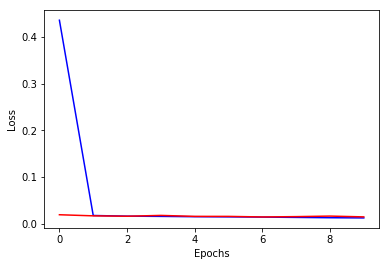

In [30]:
# Plotting the data
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Graphs/3_Model_5.png")

In [31]:
Model_5.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_5 (Cropping2D)        (None, 85, 320, 3)    0           cropping2d_input_5[0][0]         
____________________________________________________________________________________________________
lambda_5 (Lambda)                (None, 85, 320, 3)    0           cropping2d_5[0][0]               
____________________________________________________________________________________________________
convolution2d_9 (Convolution2D)  (None, 81, 316, 6)    456         lambda_5[0][0]                   
____________________________________________________________________________________________________
activation_11 (Activation)       (None, 81, 316, 6)    0           convolution2d_9[0][0]            
___________________________________________________________________________________________

In [32]:
# Model 6
# Adding leaky relu as activation and reversing the kernal size
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Convolution2D,Lambda,Cropping2D,MaxPooling2D,Dropout
from keras.layers.advanced_activations import LeakyReLU

Model_6 = Sequential()

# Image Augumentation
# 1. Cropping image
Model_6.add(Cropping2D(cropping=((55,20),(0,0)),input_shape=(160,320,3)))
# 2. Normalization of image
Model_6.add(Lambda(lambda x:(x/255.0)-0.5))

# Neural Networks
# Layer 1
Model_6.add(Convolution2D(6,5,5))
Model_6.add(Activation("linear"))
Model_6.add(MaxPooling2D(pool_size=(2,2)))
Model_6.add(LeakyReLU(alpha=0.003))

# Layer 2
Model_6.add(Convolution2D(36,5,5))
Model_6.add(Activation("linear"))
Model_6.add(MaxPooling2D(pool_size=(2,2)))
Model_6.add(LeakyReLU(alpha=0.003))

# Layer 3
Model_6.add(Flatten())
Model_6.add(Dense(256))

# Layer 4
Model_6.add(Dense(1))

Model_6.compile(loss='mse',optimizer='Adam')

In [33]:
history=Model_6.fit(X_augument,Y_augument,validation_split=0.2,shuffle=True,nb_epoch=10)
Model_6.save("3_Model_6.h5")

Train on 8654 samples, validate on 2164 samples
Epoch 1/10
8654/8654 [==============================] - 34s - loss: 1.3596 - val_loss: 0.0352
Epoch 2/10
8654/8654 [==============================] - 34s - loss: 0.0262 - val_loss: 0.0231
Epoch 3/10
8654/8654 [==============================] - 34s - loss: 0.0201 - val_loss: 0.0194
Epoch 4/10
8654/8654 [==============================] - 34s - loss: 0.0176 - val_loss: 0.0173
Epoch 5/10
8654/8654 [==============================] - 34s - loss: 0.0158 - val_loss: 0.0176
Epoch 6/10
8654/8654 [==============================] - 34s - loss: 0.0145 - val_loss: 0.0156
Epoch 7/10
8654/8654 [==============================] - 34s - loss: 0.0131 - val_loss: 0.0153
Epoch 8/10
8654/8654 [==============================] - 34s - loss: 0.0122 - val_loss: 0.0144
Epoch 9/10
8654/8654 [==============================] - 34s - loss: 0.0114 - val_loss: 0.0145
Epoch 10/10
8654/8654 [==============================] - 34s - loss: 0.0105 - val_loss: 0.0138


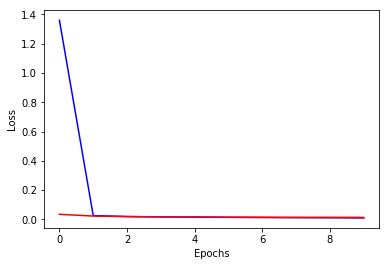

In [34]:
# Plotting the data
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Graphs/3_Model_6.png")

In [35]:
Model_6.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_6 (Cropping2D)        (None, 85, 320, 3)    0           cropping2d_input_6[0][0]         
____________________________________________________________________________________________________
lambda_6 (Lambda)                (None, 85, 320, 3)    0           cropping2d_6[0][0]               
____________________________________________________________________________________________________
convolution2d_12 (Convolution2D) (None, 81, 316, 6)    456         lambda_6[0][0]                   
____________________________________________________________________________________________________
activation_14 (Activation)       (None, 81, 316, 6)    0           convolution2d_12[0][0]           
___________________________________________________________________________________________

In [36]:
# Model 7
# Model selected from 1st set
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Convolution2D,Lambda,Cropping2D,MaxPooling2D

#Model Creation
Model_7 = Sequential()

# Image Augumentation
# 1. Cropping image
Model_7.add(Cropping2D(cropping=((55,20),(0,0)),input_shape=(160,320,3)))
# 2. Normalization of image
Model_7.add(Lambda(lambda x:(x/255.0)-0.5))

# Neural Networks

# Layer 1
Model_7.add(Convolution2D(6,3,3))
Model_7.add(MaxPooling2D(pool_size=(2,2)))
Model_7.add(Activation("elu"))
# Layer 2
Model_7.add(Flatten())
Model_7.add(Dense(120))
Model_7.add(Activation("relu"))
# Layer 3
Model_7.add(Dense(1))

Model_7.compile(loss='mse',optimizer='Adam')

In [37]:
history=Model_7.fit(X_augument,Y_augument,validation_split=0.2,shuffle=True,nb_epoch=10)
Model_7.save("3_Model_7.h5")

Train on 8654 samples, validate on 2164 samples
Epoch 1/10
8654/8654 [==============================] - 17s - loss: 0.0741 - val_loss: 0.0135
Epoch 2/10
8654/8654 [==============================] - 17s - loss: 0.0104 - val_loss: 0.0120
Epoch 3/10
8654/8654 [==============================] - 17s - loss: 0.0077 - val_loss: 0.0111
Epoch 4/10
8654/8654 [==============================] - 16s - loss: 0.0064 - val_loss: 0.0109
Epoch 5/10
8654/8654 [==============================] - 17s - loss: 0.0048 - val_loss: 0.0110
Epoch 6/10
8654/8654 [==============================] - 17s - loss: 0.0037 - val_loss: 0.0119
Epoch 7/10
8654/8654 [==============================] - 17s - loss: 0.0031 - val_loss: 0.0126
Epoch 8/10
8654/8654 [==============================] - 17s - loss: 0.0024 - val_loss: 0.0115
Epoch 9/10
8654/8654 [==============================] - 17s - loss: 0.0020 - val_loss: 0.0119
Epoch 10/10
8654/8654 [==============================] - 17s - loss: 0.0016 - val_loss: 0.0113


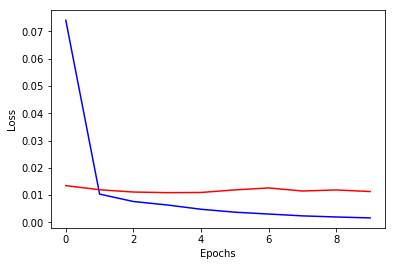

In [38]:
# Plotting the data
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Graphs/3_Model_7.png")

In [39]:
Model_7.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_7 (Cropping2D)        (None, 85, 320, 3)    0           cropping2d_input_7[0][0]         
____________________________________________________________________________________________________
lambda_7 (Lambda)                (None, 85, 320, 3)    0           cropping2d_7[0][0]               
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 83, 318, 6)    168         lambda_7[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_14 (MaxPooling2D)   (None, 41, 159, 6)    0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [40]:
# Model 8
# Model selected from 1st set
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Convolution2D,Lambda,Cropping2D,MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

#Model Creation
Model_8 = Sequential()

# Image Augumentation
# 1. Cropping image
Model_8.add(Cropping2D(cropping=((55,20),(0,0)),input_shape=(160,320,3)))
# 2. Normalization of image
Model_8.add(Lambda(lambda x:(x/255.0)-0.5))

# Neural Networks

# Layer 1
Model_8.add(Convolution2D(6,5,5))
Model_8.add(Activation("linear"))
Model_8.add(MaxPooling2D(pool_size=(2,2)))
Model_8.add(LeakyReLU(alpha=0.003))

# Layer 2
Model_8.add(Flatten())
Model_8.add(Dense(120))
Model_8.add(Activation("relu"))
# Layer 3
Model_8.add(Dense(1))

Model_8.compile(loss='mse',optimizer='Adam')

In [41]:
history=Model_8.fit(X_augument,Y_augument,validation_split=0.2,shuffle=True,nb_epoch=10)
Model_8.save("3_Model_8.h5")

Train on 8654 samples, validate on 2164 samples
Epoch 1/10
8654/8654 [==============================] - 20s - loss: 0.4194 - val_loss: 0.0358
Epoch 2/10
8654/8654 [==============================] - 19s - loss: 0.0316 - val_loss: 0.0296
Epoch 3/10
8654/8654 [==============================] - 20s - loss: 0.0256 - val_loss: 0.0247
Epoch 4/10
8654/8654 [==============================] - 19s - loss: 0.0208 - val_loss: 0.0206
Epoch 5/10
8654/8654 [==============================] - 20s - loss: 0.0167 - val_loss: 0.0175
Epoch 6/10
8654/8654 [==============================] - 20s - loss: 0.0141 - val_loss: 0.0157
Epoch 7/10
8654/8654 [==============================] - 20s - loss: 0.0115 - val_loss: 0.0140
Epoch 8/10
8654/8654 [==============================] - 20s - loss: 0.0100 - val_loss: 0.0134
Epoch 9/10
8654/8654 [==============================] - 20s - loss: 0.0083 - val_loss: 0.0127
Epoch 10/10
8654/8654 [==============================] - 20s - loss: 0.0072 - val_loss: 0.0130


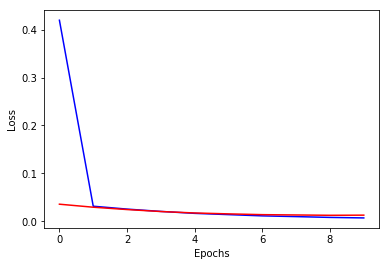

In [42]:
# Plotting the data
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Graphs/summa.png")

In [43]:
Model_8.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_8 (Cropping2D)        (None, 85, 320, 3)    0           cropping2d_input_8[0][0]         
____________________________________________________________________________________________________
lambda_8 (Lambda)                (None, 85, 320, 3)    0           cropping2d_8[0][0]               
____________________________________________________________________________________________________
convolution2d_15 (Convolution2D) (None, 81, 316, 6)    456         lambda_8[0][0]                   
____________________________________________________________________________________________________
activation_18 (Activation)       (None, 81, 316, 6)    0           convolution2d_15[0][0]           
___________________________________________________________________________________________